## Predicting drug

Right now we have FOUR "slices" in which we assume people are homogeneous with respect to probability of taking a drug. We use the slices to calculate the probability of a person taking a drug $d$ in a given bin, denoted:  $$p_{d,year,age,periodRx,numberPeriods}$$ 


Going through these subscripts, they are:
- **Year** and **age** (binned in ~5 year intervals up to old age)

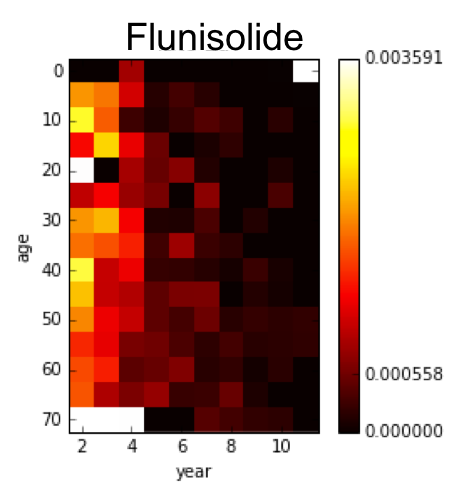

In [4]:
Image(filename='png/flunisolide_year_age.png',width=300)

- **periodRx**: Number of prescriptions given in a certain year/age.  For example, below, with a fixed year of 2008, the y-axis shows probability of a simvastatin prescription. This probability increases with age (colored solid lines) **and** with number of Rx in that single year, single age (x-axis).

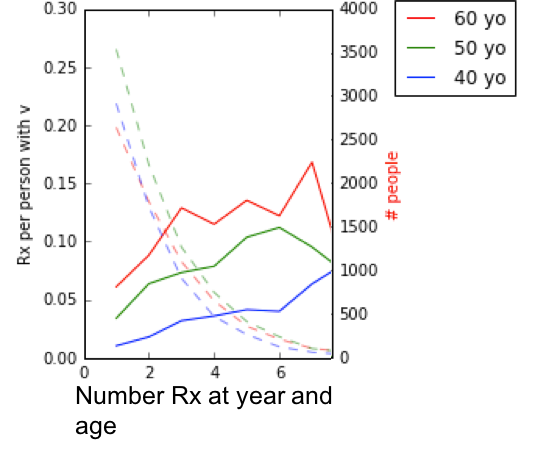

In [8]:
Image(filename='png/period_rx.png',width=350)

- **numberPeriods**: Medical care over time.  Below, frequency of Rx of flunisolide is shown, for only people with ONE prescription at a given year/age. We compare two sets of people, those observed for 6 years (plus two comparison years) and those observed for 1 year (plus two comparison years). People observed for a longer span of time (blue) have a consistently higher frequency of prescription of this drug than people observed for only one time point, across most ages and years.  From the heatmap plot, above, you can see the highest frequency of flunisolide is in years 2 to 3. Slicing by numberPeriods tells us that this pattern is stronger for people with longer medical care. 

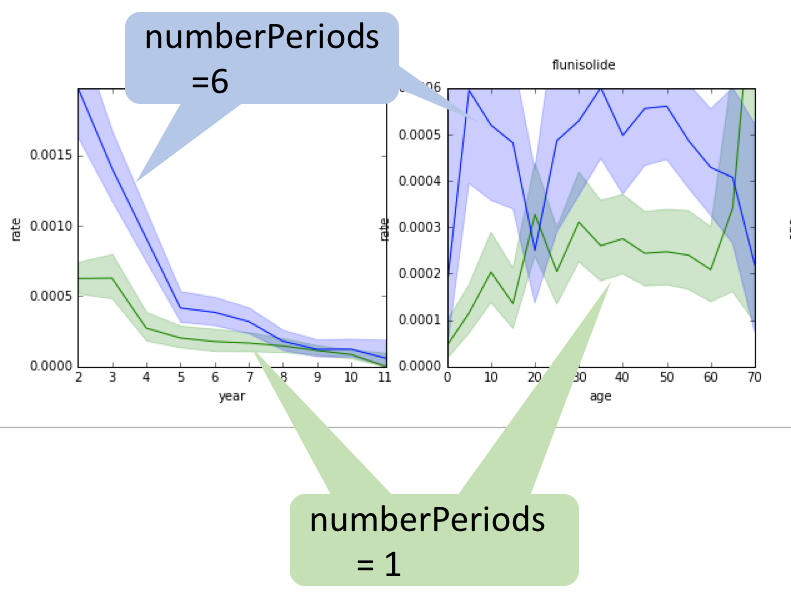

In [16]:
Image(filename='png/numberPeriods.png',width=600)

## Strategy
- Treat these four axes as independent:  
    - 17 **age** bins
    - 11 **years**
    - Up to 40 **periodRx** per age/year
    - Up to 15 **numberPeriods**, the number of age/year observations per person
- ---> = around 26000 bins (observed).  Too many bins for one county!  
- THUS: Start with whole of USA, putting all counties together. It's still a bit sparse because of rare bins!  Below, I plot the histogram of number of observations per bin, for all bins. (An observation is a person observed at a given bin.  People can be observed in more than one bin, when they are observed at multiple ages and years.)
    

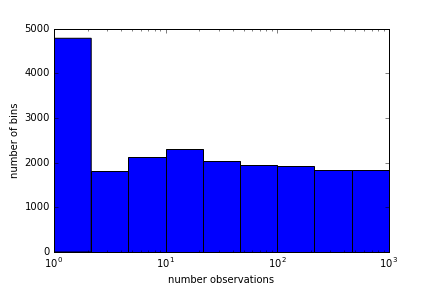

In [14]:
Image(filename='png/bins_obs.png',width=400)

Thus, I merged together bins of higher numberPeriods. Still testing how much merging of bins we can get away with. If you only consider bins with **less than 10 periodRx**, observations are much less sparse (histogram below).  But probably people with cancer will fall more into the higher-medical-care bins.

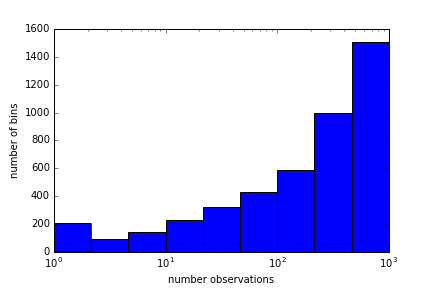

In [15]:
Image(filename='png/less_than_10.png',width=400)

## Evaluation on random people
This is the same as we discussed last time: for each county, I choose random people, then a random time period for each selected person. Below, Person A is selected, and any time period from age 48 to age 52 could be randomly selected for that person: one time period is selected in the dark gray box.  To keep things simple, we just select one bin for each person.  

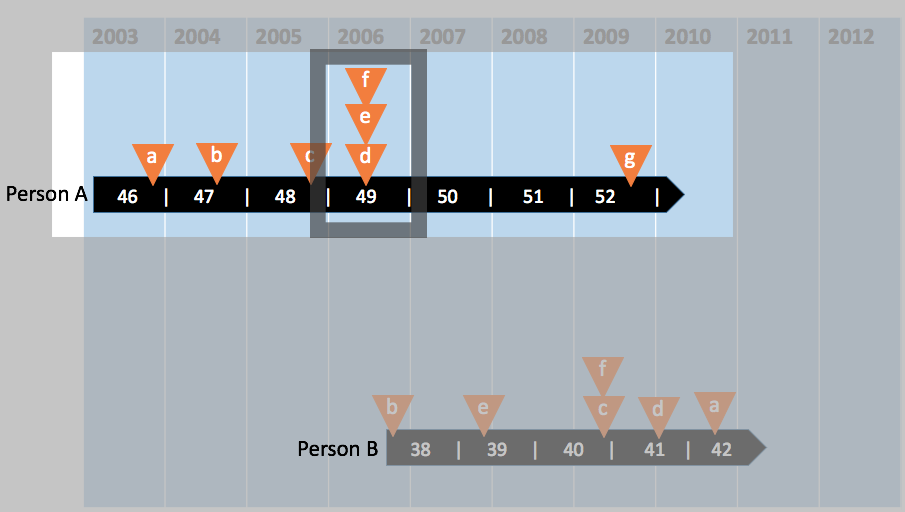

In [22]:
Image(filename='png/random_eval.png',width=800)

For each randomly selected person $i$, she has $\left\vert b_i \right\vert$ bins, consisting of a year and age.  For the example of Person A, this is 5 bins, occurring after the "comparison window". From these 5 bins, we randomly select one bin $\{y,a\}$. For Person A, we select bin $\{2006, 45\}$. This bin has the set of prescriptions denoted: $Rx_{i_{y,a}}$ with $Rx_{i_{2006,45}} = \{d,e,f\}$ and $\left\vert Rx_{i_{2006,45}} \right\vert= 3$.  Summing across all people, we can get our Expected and Observed number of prescriptions.

$$ E_{d} = \sum_{i}  \hat{p}_{d,y,a,\left\vert Rx_{i_{y,a}}\right\vert, \left\vert b_i \right\vert }$$ 
$$ O_{d} = \sum_{i} I(d \in Rx_{i_{y,a} }) $$

Then we can compare across our random selections the values of $E_d, O_d, O_d/E_d$

I run this a bunch of times and make sure that the ratios are not correlated.  Below, is a result for some selected drugs for eight runs: each of the blue points is one run. I compare observed versus expected number of Rx.  X and Y axes are identical per each plot (but note they vary a lot between drugs). The green dashed line then represents a perfect prediction, and hopefully, we'd want our points to fall equally above and below that line (sometimes you over-estimate, sometimes underestimate).  

I think it looks pretty good.  However, clearly the variance is greater on the Observed than the Expected. I'm a little worried about that, still thinking how to find out if I'm missing something (possibly counties, below?)

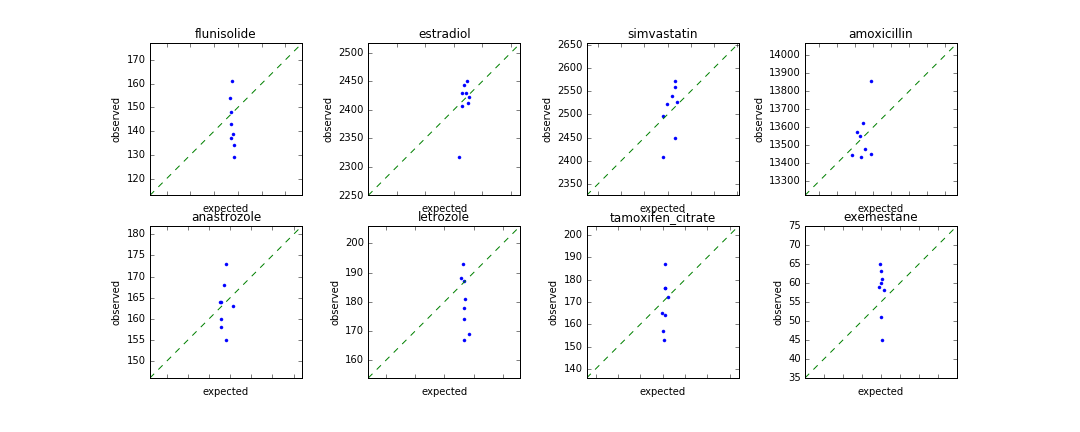

In [28]:
Image(filename='png/rand_runs.png',width=1000)


### Effect of counties?
Can I just ignore counties? (lots of people don't have county) But this assumes breast cancer is independent of county which probably isnt true

I evaluate county effect in the same way, by choosing random people for each county. I get the ratio $O_d/E_d$, averaged across 5 random runs across the county.  Below, Each box in the heatmap represents the ratio $O_d/E_d$ for one county and one drug. I cluster all counties in New York  and California (across the drugs with the highest variance in ratio).  The red/blue bar indicates CA vs NY counties: simple correlation clustering perfectly separates the two states' counties.  Neighboring counties clearly have a similar relationship (cluster close together).  

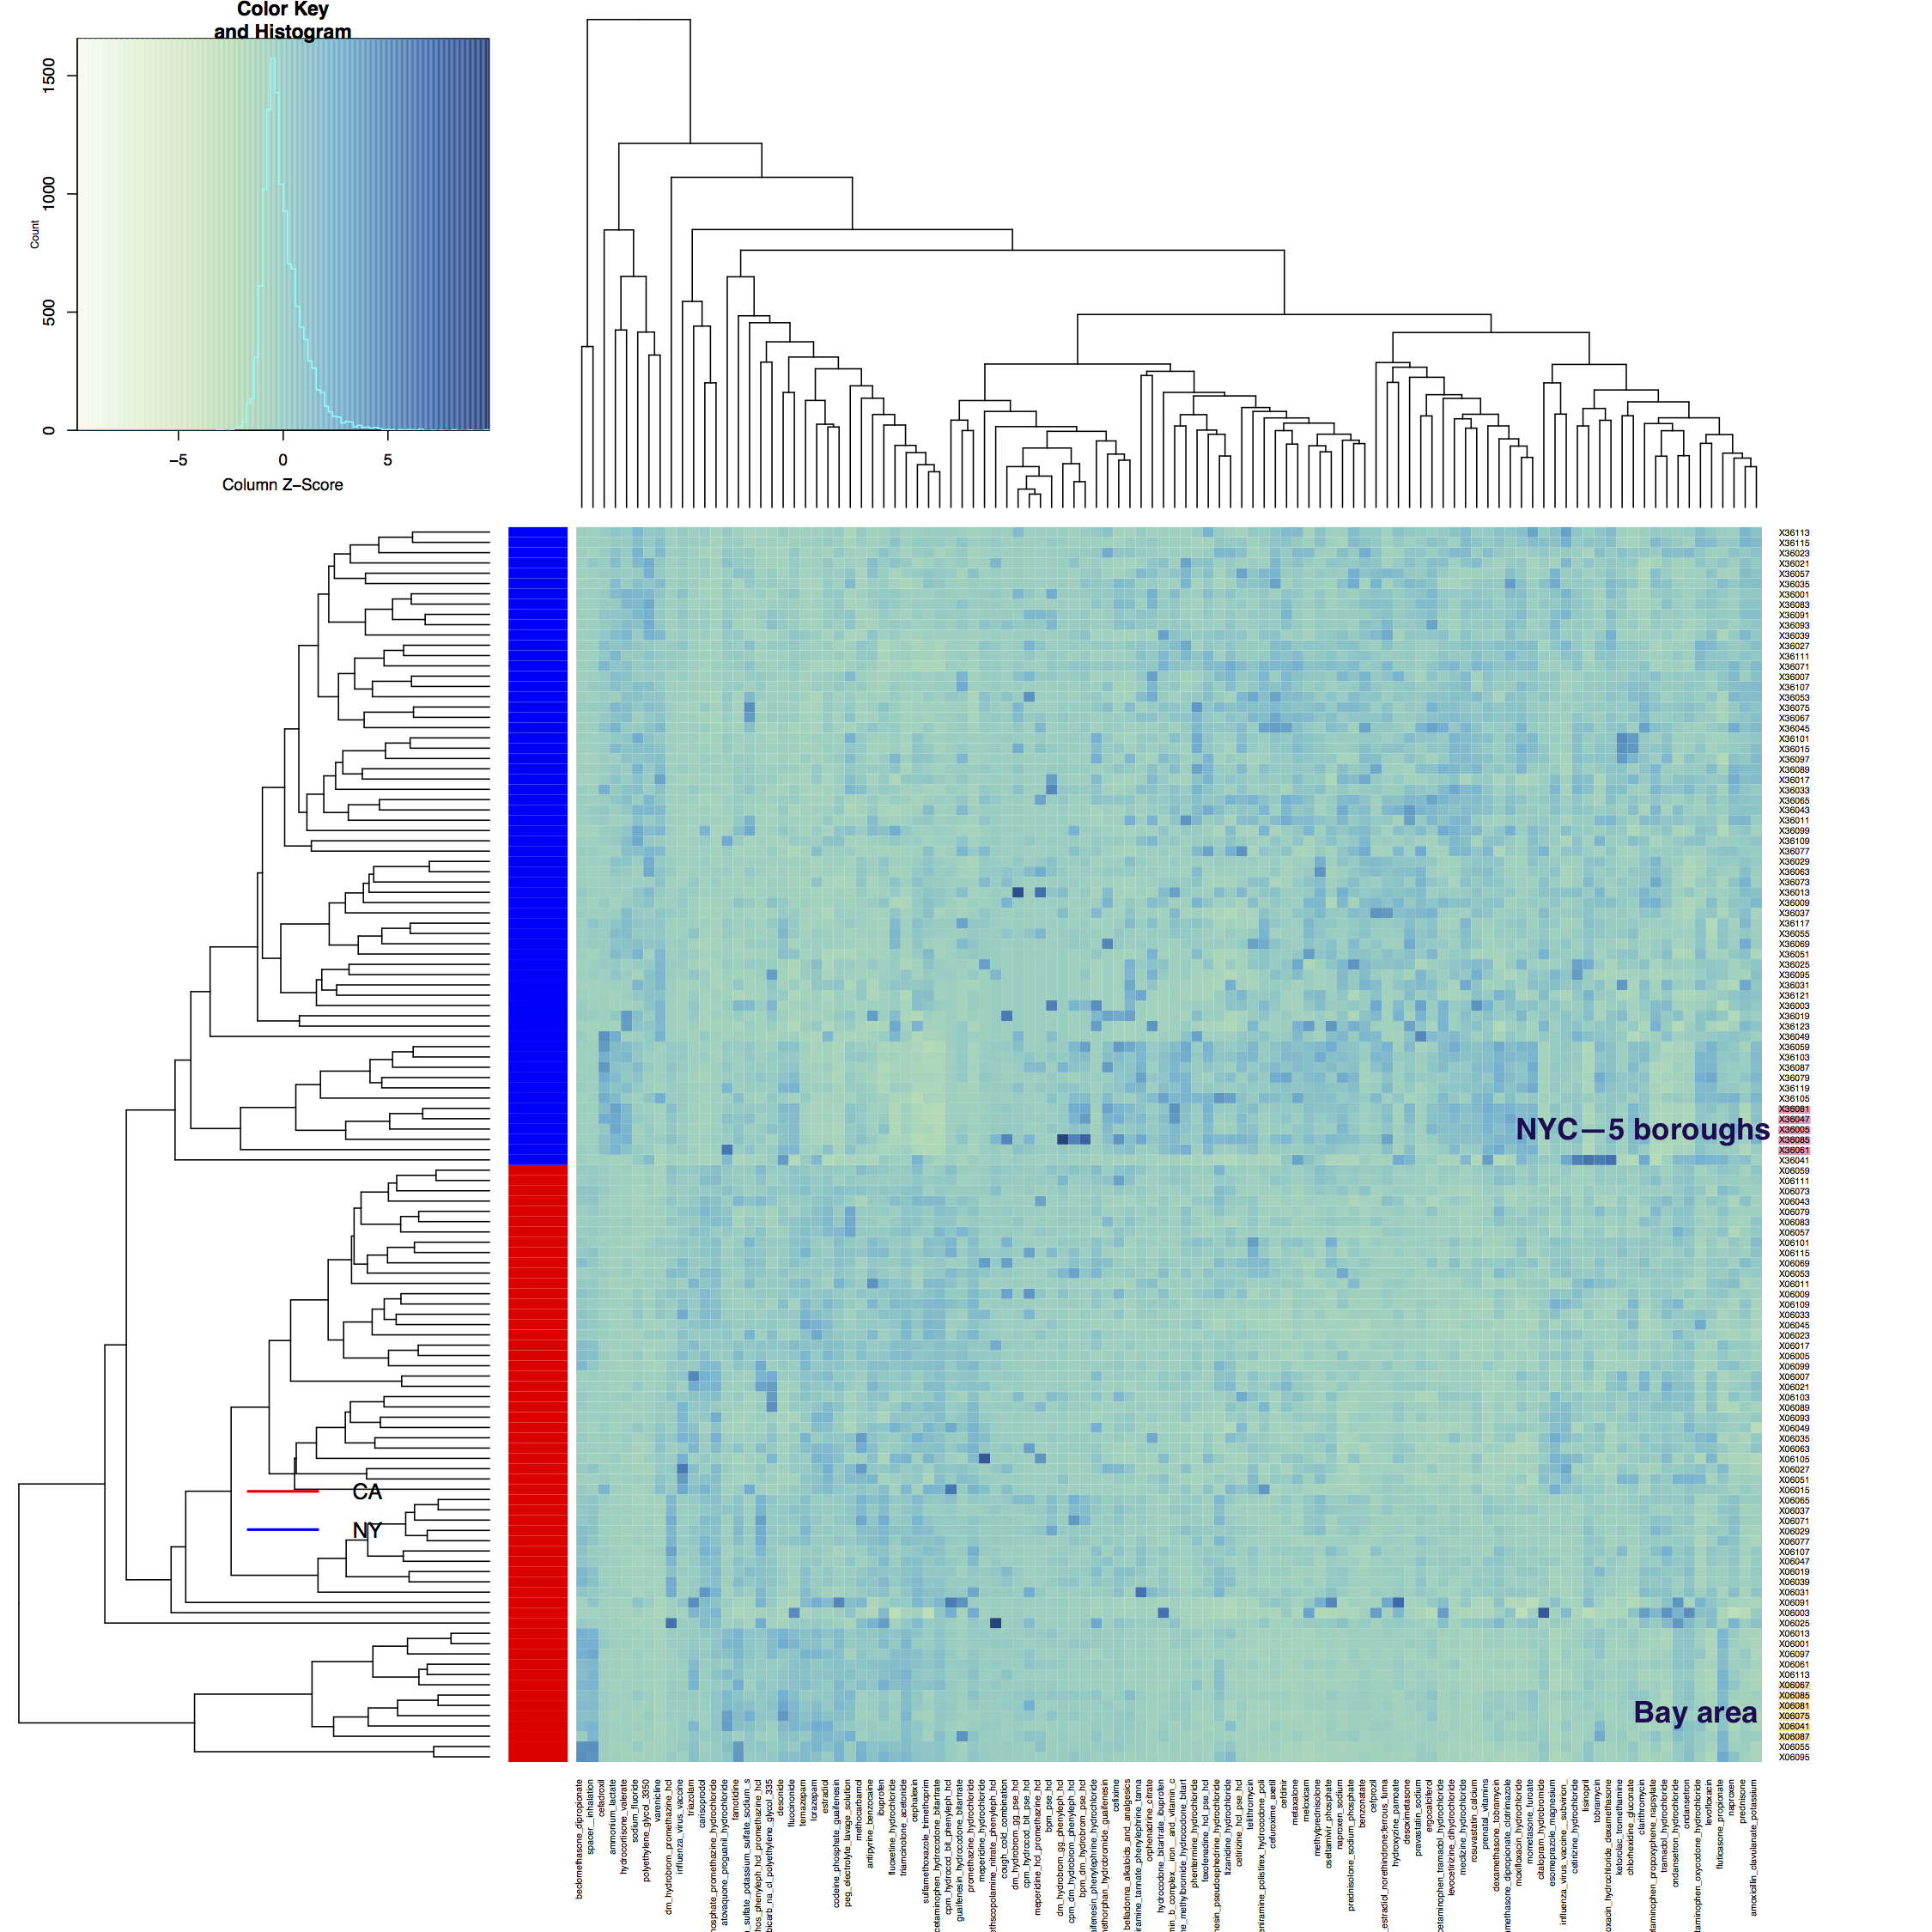

In [24]:
Image(filename='png/canyOE.png',width=1000)

Very interesting, worth looking into, but does it impact the estimation of cancer effect on drug? Plan:
- Evaluate $O_d/E_d$ for cancer patients from each county
- See how this varies across counties as compared to the random results above.

In [1]:
from IPython.display import Image